In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


food_delivery_data = pd.DataFrame({
    'order_id': list(range(101, 301)),  # 200 orders
    'customer_id': np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 200),
    'order_date': np.random.choice([
        '2024-01-01 12:30:00', '2024-01-01 18:45:00', '2024-01-03 14:15:00',
        '2024-01-04 11:00:00', '2024-01-05 19:00:00', '2024-01-06 13:30:00',
        '2024-01-07 17:45:00', '2024-01-08 12:15:00', '2024-01-09 19:30:00',
        '2024-01-10 14:00:00'
    ], 200),
    'delivery_time': np.random.choice([
        '2024-01-01 13:00:00', '2024-01-01 19:20:00', '2024-01-03 14:45:00',
        '2024-01-04 11:30:00', '2024-01-05 19:30:00', '2024-01-06 14:00:00',
        '2024-01-07 18:15:00', '2024-01-08 12:45:00', '2024-01-09 20:00:00',
        '2024-01-10 14:30:00'
    ], 200),
    'meal_category': np.random.choice(['Burgers', 'Pizza', 'Salads', 'Chinese', 'Pizza'], 200),
    'order_amount': np.random.choice([15.99, 22.50, 12.00, 18.99, 20.00, 25.99, 
                                    30.50, 16.99, 28.50, 21.99], 200),
    'delivery_fee': np.random.choice([2.50, 3.00, 2.00, 2.75, 3.00], 200),
    'payment_method': np.random.choice(['Credit Card', 'PayPal', 'Debit Card', 'Credit Card', 'Cash'], 200),
    'loyalty_points': np.random.choice([10, 5, 15, 7, 0, 20, 12, 8, 25, 3], 200),
    'customer_since': np.random.choice([
        '2023-01-01', '2023-06-15', '2023-01-01', '2024-01-01', '2023-12-01',
        '2023-03-15', '2023-08-01', '2023-05-20', '2023-11-10', '2023-07-25'
    ], 200)
})



In [226]:
df= food_delivery_data

In [227]:
df
original_copy = df.copy()

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        200 non-null    int64  
 1   customer_id     200 non-null    int32  
 2   order_date      200 non-null    object 
 3   delivery_time   200 non-null    object 
 4   meal_category   200 non-null    object 
 5   order_amount    200 non-null    float64
 6   delivery_fee    200 non-null    float64
 7   payment_method  200 non-null    object 
 8   loyalty_points  200 non-null    int32  
 9   customer_since  200 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 14.2+ KB


# Temporal 

In [229]:
from datetime import datetime

In [230]:
df['hour'] = pd.to_datetime(df['order_date']).dt.hour
df['month'] = pd.to_datetime(df['order_date']).dt.month
df['day'] = pd.to_datetime(df['order_date']).dt.day
#df['day_of_week'] = pd.to_datetime(df['order_date']).dt.dayofweek

df['weekend_purchase'] = (pd.to_datetime(df['order_date']).dt.dayofweek  >= 5).astype(int)

In [231]:
df

,order_id,customer_id,order_date,delivery_time,meal_category,order_amount,delivery_fee,payment_method,loyalty_points,customer_since,hour,month,day,weekend_purchase
0,101,9,2024-01-01 18:45:00,2024-01-01 19:20:00,Pizza,12.00,3.00,Cash,5,2023-08-01,18,1,1,0
1,102,8,2024-01-01 18:45:00,2024-01-08 12:45:00,Pizza,16.99,2.50,Cash,25,2023-06-15,18,1,1,0
2,103,3,2024-01-05 19:00:00,2024-01-10 14:30:00,Chinese,15.99,3.00,Debit Card,3,2023-08-01,19,1,5,0
3,104,10,2024-01-01 12:30:00,2024-01-08 12:45:00,Pizza,12.00,3.00,Debit Card,20,2023-11-10,12,1,1,0
4,105,3,2024-01-10 14:00:00,2024-01-09 20:00:00,Burgers,25.99,2.00,Credit Card,12,2023-07-25,14,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,8,2024-01-01 12:30:00,2024-01-01 13:00:00,Pizza,25.99,3.00,Credit Card,12,2023-03-15,12,1,1,0
196,297,10,2024-01-10 14:00:00,2024-01-01 13:00:00,Chinese,15.99,2.50,Credit Card,25,2023-06-15,14,1,10,0
197,298,10,2024-01-09 19:30:00,2024-01-04 11:30:00,Pizza,22.50,2.75,Credit Card,15,2023-05-20,19,1,9,0
198,299,5,2024-01-01 12:30:00,2024-01-06 14:00:00,Chinese,12.00,2.50,Debit Card,3,2023-05-20,12,1,1,0


# One Hot Encoding

In [232]:
df['is_credit'] = pd.get_dummies(df['payment_method'].str.contains('Credit'), drop_first = True,dtype=int)
df

,order_id,customer_id,order_date,delivery_time,meal_category,order_amount,delivery_fee,payment_method,loyalty_points,customer_since,hour,month,day,weekend_purchase,is_credit
0,101,9,2024-01-01 18:45:00,2024-01-01 19:20:00,Pizza,12.00,3.00,Cash,5,2023-08-01,18,1,1,0,0
1,102,8,2024-01-01 18:45:00,2024-01-08 12:45:00,Pizza,16.99,2.50,Cash,25,2023-06-15,18,1,1,0,0
2,103,3,2024-01-05 19:00:00,2024-01-10 14:30:00,Chinese,15.99,3.00,Debit Card,3,2023-08-01,19,1,5,0,0
3,104,10,2024-01-01 12:30:00,2024-01-08 12:45:00,Pizza,12.00,3.00,Debit Card,20,2023-11-10,12,1,1,0,0
4,105,3,2024-01-10 14:00:00,2024-01-09 20:00:00,Burgers,25.99,2.00,Credit Card,12,2023-07-25,14,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,8,2024-01-01 12:30:00,2024-01-01 13:00:00,Pizza,25.99,3.00,Credit Card,12,2023-03-15,12,1,1,0,1
196,297,10,2024-01-10 14:00:00,2024-01-01 13:00:00,Chinese,15.99,2.50,Credit Card,25,2023-06-15,14,1,10,0,1
197,298,10,2024-01-09 19:30:00,2024-01-04 11:30:00,Pizza,22.50,2.75,Credit Card,15,2023-05-20,19,1,9,0,1
198,299,5,2024-01-01 12:30:00,2024-01-06 14:00:00,Chinese,12.00,2.50,Debit Card,3,2023-05-20,12,1,1,0,0


# Customer Behaviour

In [233]:
df

,order_id,customer_id,order_date,delivery_time,meal_category,order_amount,delivery_fee,payment_method,loyalty_points,customer_since,hour,month,day,weekend_purchase,is_credit
0,101,9,2024-01-01 18:45:00,2024-01-01 19:20:00,Pizza,12.00,3.00,Cash,5,2023-08-01,18,1,1,0,0
1,102,8,2024-01-01 18:45:00,2024-01-08 12:45:00,Pizza,16.99,2.50,Cash,25,2023-06-15,18,1,1,0,0
2,103,3,2024-01-05 19:00:00,2024-01-10 14:30:00,Chinese,15.99,3.00,Debit Card,3,2023-08-01,19,1,5,0,0
3,104,10,2024-01-01 12:30:00,2024-01-08 12:45:00,Pizza,12.00,3.00,Debit Card,20,2023-11-10,12,1,1,0,0
4,105,3,2024-01-10 14:00:00,2024-01-09 20:00:00,Burgers,25.99,2.00,Credit Card,12,2023-07-25,14,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,8,2024-01-01 12:30:00,2024-01-01 13:00:00,Pizza,25.99,3.00,Credit Card,12,2023-03-15,12,1,1,0,1
196,297,10,2024-01-10 14:00:00,2024-01-01 13:00:00,Chinese,15.99,2.50,Credit Card,25,2023-06-15,14,1,10,0,1
197,298,10,2024-01-09 19:30:00,2024-01-04 11:30:00,Pizza,22.50,2.75,Credit Card,15,2023-05-20,19,1,9,0,1
198,299,5,2024-01-01 12:30:00,2024-01-06 14:00:00,Chinese,12.00,2.50,Debit Card,3,2023-05-20,12,1,1,0,0


In [234]:
from datetime import date
today = date.today()
today = pd.to_datetime(today)

df['customer_tenure'] = today - pd.to_datetime(df['customer_since'])
df['customer_tenure'] = df['customer_tenure'].dt.days
df

,order_id,customer_id,order_date,delivery_time,meal_category,order_amount,delivery_fee,payment_method,loyalty_points,customer_since,hour,month,day,weekend_purchase,is_credit,customer_tenure
0,101,9,2024-01-01 18:45:00,2024-01-01 19:20:00,Pizza,12.00,3.00,Cash,5,2023-08-01,18,1,1,0,0,514
1,102,8,2024-01-01 18:45:00,2024-01-08 12:45:00,Pizza,16.99,2.50,Cash,25,2023-06-15,18,1,1,0,0,561
2,103,3,2024-01-05 19:00:00,2024-01-10 14:30:00,Chinese,15.99,3.00,Debit Card,3,2023-08-01,19,1,5,0,0,514
3,104,10,2024-01-01 12:30:00,2024-01-08 12:45:00,Pizza,12.00,3.00,Debit Card,20,2023-11-10,12,1,1,0,0,413
4,105,3,2024-01-10 14:00:00,2024-01-09 20:00:00,Burgers,25.99,2.00,Credit Card,12,2023-07-25,14,1,10,0,1,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,8,2024-01-01 12:30:00,2024-01-01 13:00:00,Pizza,25.99,3.00,Credit Card,12,2023-03-15,12,1,1,0,1,653
196,297,10,2024-01-10 14:00:00,2024-01-01 13:00:00,Chinese,15.99,2.50,Credit Card,25,2023-06-15,14,1,10,0,1,561
197,298,10,2024-01-09 19:30:00,2024-01-04 11:30:00,Pizza,22.50,2.75,Credit Card,15,2023-05-20,19,1,9,0,1,587
198,299,5,2024-01-01 12:30:00,2024-01-06 14:00:00,Chinese,12.00,2.50,Debit Card,3,2023-05-20,12,1,1,0,0,587


## Lifetime Value

In [235]:
df['Subtotal'] = df['order_amount'] + df['delivery_fee']
life = df[['customer_id','Subtotal']]
grouped_total = life.groupby(by =['customer_id']).sum() 
grouped_total

,Subtotal
customer_id,
1,647.65
2,327.43
3,522.12
4,376.67
5,433.94
6,590.86
7,441.41
8,434.63
9,451.16


In [236]:
Lifetime_Value = grouped_total['Subtotal'] / df['customer_tenure']

In [237]:
Lifetime_Value

0           NaN
1      1.154456
2      0.637023
3      1.264213
4      0.722975
         ...   
195         NaN
196         NaN
197         NaN
198         NaN
199         NaN
Length: 200, dtype: float64

# Numerical

In [238]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Normalization
scaler_norm = MinMaxScaler()
df['normalized_amount']= scaler_norm.fit_transform(df[['order_amount']])


## Spending Category

In [241]:
df['Spending_category'] = pd.cut(df['order_amount'], bins = [0,20,40,70] , labels = ['Low', 'Medium','High'])

In [243]:
df

,order_id,customer_id,order_date,delivery_time,meal_category,order_amount,delivery_fee,payment_method,loyalty_points,customer_since,hour,month,day,weekend_purchase,is_credit,customer_tenure,Subtotal,normalized_amount,Spending_category
0,101,9,2024-01-01 18:45:00,2024-01-01 19:20:00,Pizza,12.00,3.00,Cash,5,2023-08-01,18,1,1,0,0,514,15.00,0.000000,Low
1,102,8,2024-01-01 18:45:00,2024-01-08 12:45:00,Pizza,16.99,2.50,Cash,25,2023-06-15,18,1,1,0,0,561,19.49,0.269730,Low
2,103,3,2024-01-05 19:00:00,2024-01-10 14:30:00,Chinese,15.99,3.00,Debit Card,3,2023-08-01,19,1,5,0,0,514,18.99,0.215676,Low
3,104,10,2024-01-01 12:30:00,2024-01-08 12:45:00,Pizza,12.00,3.00,Debit Card,20,2023-11-10,12,1,1,0,0,413,15.00,0.000000,Low
4,105,3,2024-01-10 14:00:00,2024-01-09 20:00:00,Burgers,25.99,2.00,Credit Card,12,2023-07-25,14,1,10,0,1,521,27.99,0.756216,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,8,2024-01-01 12:30:00,2024-01-01 13:00:00,Pizza,25.99,3.00,Credit Card,12,2023-03-15,12,1,1,0,1,653,28.99,0.756216,Medium
196,297,10,2024-01-10 14:00:00,2024-01-01 13:00:00,Chinese,15.99,2.50,Credit Card,25,2023-06-15,14,1,10,0,1,561,18.49,0.215676,Low
197,298,10,2024-01-09 19:30:00,2024-01-04 11:30:00,Pizza,22.50,2.75,Credit Card,15,2023-05-20,19,1,9,0,1,587,25.25,0.567568,Medium
198,299,5,2024-01-01 12:30:00,2024-01-06 14:00:00,Chinese,12.00,2.50,Debit Card,3,2023-05-20,12,1,1,0,0,587,14.50,0.000000,Low


# Domain-Specific

In [244]:
order_time = pd.to_datetime(df['order_date']).dt.minute
delivery = pd.to_datetime(df['delivery_time']).dt.minute

time_to_deliver = delivery - order_time

df['greater_30'] = (time_to_deliver > 30).astype(int)

In [172]:
df

,order_id,customer_id,order_date,delivery_time,meal_category,order_amount,delivery_fee,payment_method,loyalty_points,customer_since,...,day_of_week,weekend_purchase,is_pizza,is_credit,curtomer_tenure,Subtotal,customer_tenure,normalized_amount,Spending_category,greater_30
0,101,1,2024-01-01 12:30:00,2024-01-01 13:00:00,Burgers,15.99,2.50,Credit Card,10,2023-01-01,...,0,False,0,1,724 days,18.49,724,0.380000,High,0
1,102,2,2024-01-01 18:45:00,2024-01-01 19:20:00,Pizza,22.50,3.00,PayPal,5,2023-06-15,...,0,False,1,0,559 days,25.50,559,1.000000,High,0
2,103,1,2024-01-03 14:15:00,2024-01-03 14:45:00,Salads,12.00,2.00,Debit Card,15,2023-01-01,...,2,False,0,0,724 days,14.00,724,0.000000,Medium,0
3,104,3,2024-01-04 11:00:00,2024-01-04 11:30:00,Chinese,18.99,2.75,Credit Card,7,2024-01-01,...,3,False,0,1,359 days,21.74,359,0.665714,High,0
4,105,4,2024-01-05 19:00:00,2024-01-05 19:30:00,Pizza,20.00,3.00,Cash,0,2023-12-01,...,4,False,1,0,390 days,23.00,390,0.761905,High,0


## Ranks according to Loyalty Points

In [255]:
loyalty = df[['customer_id','loyalty_points']]
grouped_points = loyalty.groupby(by = ['customer_id']).sum()
grouped_points.sort_values(by =['loyalty_points'], ascending=False)

,loyalty_points
customer_id,
6,307
1,275
10,274
2,210
7,210
8,209
3,205
5,205
9,181


# PREPPING TABLE FOR EASIER MODELLING

In [257]:
reg_prep = df.drop(['meal_category','payment_method','delivery_time','order_date','customer_since','Spending_category'], axis = 1)

In [258]:
reg_prep

,order_id,customer_id,order_amount,delivery_fee,loyalty_points,hour,month,day,weekend_purchase,is_credit,customer_tenure,Subtotal,normalized_amount,greater_30
0,101,9,12.00,3.00,5,18,1,1,0,0,514,15.00,0.000000,0
1,102,8,16.99,2.50,25,18,1,1,0,0,561,19.49,0.269730,0
2,103,3,15.99,3.00,3,19,1,5,0,0,514,18.99,0.215676,0
3,104,10,12.00,3.00,20,12,1,1,0,0,413,15.00,0.000000,0
4,105,3,25.99,2.00,12,14,1,10,0,1,521,27.99,0.756216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,8,25.99,3.00,12,12,1,1,0,1,653,28.99,0.756216,0
196,297,10,15.99,2.50,25,14,1,10,0,1,561,18.49,0.215676,0
197,298,10,22.50,2.75,15,19,1,9,0,1,587,25.25,0.567568,0
198,299,5,12.00,2.50,3,12,1,1,0,0,587,14.50,0.000000,0


# Q: Can we predict whether a customer will make a high-value purchase (e.g., above $100) based on their purchase history, product categories, and time of purchase?

In [264]:
from sklearn.model_selection import train_test_split 
reg_prep['High_Value_purchase'] = (reg_prep['Subtotal'] > 25).astype(int)

X = reg_prep.drop(columns='High_Value_purchase',axis = 1)
y = reg_prep['High_Value_purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,)

In [265]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\favou\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [266]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
prediction = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test,prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test,prediction)
auc = roc_auc_score(y_test,y_pred_proba)
conf_matrix = confusion_matrix(y_test,prediction)

In [267]:
accuracy

0.875

In [268]:
auc

0.9605734767025089

In [269]:
conf_matrix

array([[29,  2],
       [ 3,  6]], dtype=int64)

In [270]:
recall

0.6666666666666666

In [271]:
precision

0.75

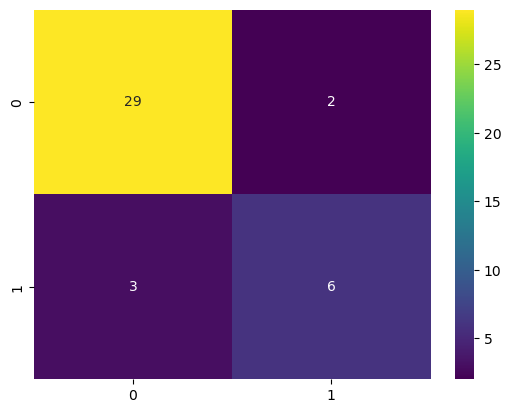

In [275]:
sns.heatmap(conf_matrix, cmap = 'viridis',annot=True)
plt.show()